**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

print(heart_disease)

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# metadata 
# print(heart_disease.metadata) 

# variable information 
# print(heart_disease.variables) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [2]:
print(f"there are: {X.isna().sum().sum()} missing features")
print(f"there are: {y.isna().sum().sum()} missing targets")

X_filled = X.fillna(X.mean())

print(f"there are: {X_filled.isna().sum().sum()} missing features")

# encoding using binary
categorical_columns = X_filled.columns[[1, 2, 5, 6, 8, 10, 12]]

import category_encoders as ce
binary_enc = ce.BinaryEncoder(cols=categorical_columns)

X_encoded = binary_enc.fit_transform(X_filled)

# normalization
from sklearn.preprocessing import MinMaxScaler
rest_of_columns = X.columns.difference(categorical_columns)

scaler = MinMaxScaler()
X_norm = X_encoded[rest_of_columns] = scaler.fit_transform(X_encoded[rest_of_columns])

there are: 6 missing features
there are: 0 missing targets
there are: 0 missing features


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [3]:
# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Test accuracy {xgb_accuracy}')

Test accuracy 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [4]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3], # default=0.3
    'n_estimators': [50, 100, 200], # default=100
    'max_depth': [3, 5, 9], # default=6
    'min_child_weight': [1, 3, 5],
}

# Create a RandomForestClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_xgb_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}
Best Model Accuracy: 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

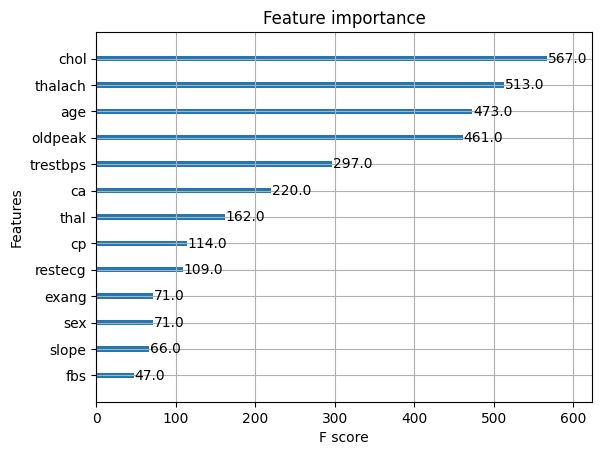

In [5]:
xgb.plot_importance(xgb_model)

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

Best Model Precision: 0.2503903903903904
Default Model Precision: 0.21794117647058822


/Users/macjack/Documents/MachineLearning/stuff/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


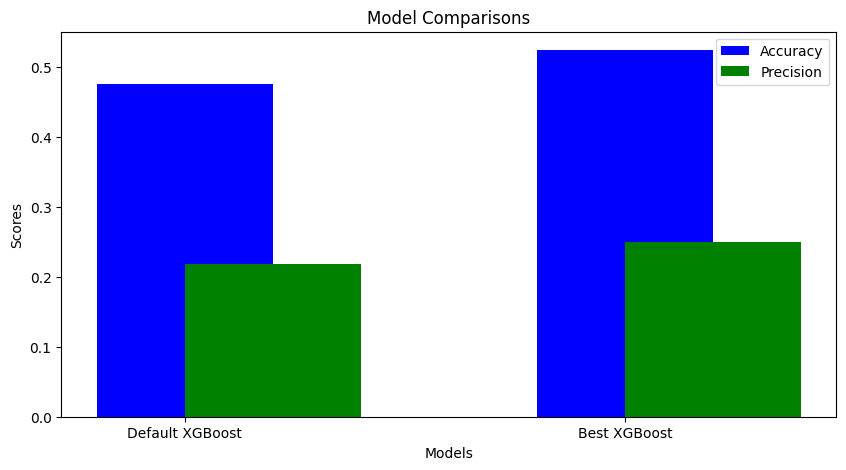

In [6]:
# obviously the tuned model performs a lot better than the "naive" (not that naive lol) model.
# tuned accuracy:     0.5245901639344263
# non-tuned accuracy: 0.47540983606557374

from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# For the best model
precision_best = precision_score(y_test, y_pred_best, average='macro')
print("Best Model Precision:", precision_best)

# For the default model
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
print(f'Default Model Precision: {xgb_precision}')

# Now we will plot accuracy and precision for both models
labels = ['Default XGBoost', 'Best XGBoost']
accuracy_scores = [xgb_accuracy, accuracy_best]
precision_scores = [xgb_precision, precision_best]

x = range(len(labels))

plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.bar(x, accuracy_scores, width=0.4, label='Accuracy', color='b', align='center')

# Plotting precision
plt.bar(x, precision_scores, width=0.4, label='Precision', color='g', align='edge')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparisons')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()